In [99]:
import quantsbin.derivativepricing as qbdp
import yfinance as yf
from datetime import date, timedelta
from datetime import datetime
from dateutil.relativedelta import *
import numpy as np

ticker = 'IWM'

strike_price = 216

buy_price = 196

now = datetime.now()

exp = '20220304'

today = date.today()

#today.strftime("%d%m%Y")
today_string = today.strftime("%Y%m%d")
'''
for i in str(today):
    if i != '-':
        today_string =today_string + i
'''

option1 = qbdp.EqOption(option_type='Call', strike=strike_price, expiry_date= exp)

#option1.payoff(220)

# SHOW PAYOFF
#eq1_payoff = qbdp.Plotting(option1,'payoff',x_axis_range=[buy_price-20,strike_price+20]).line_plot()
#eq1_payoff.show()


In [110]:
current_price = yf.download(ticker, interval = '1m',start = now+timedelta(minutes = -2), end = now)['Close'][-1]

print(current_price)

closes = yf.download(ticker, start = today + timedelta(days = -120), end = today, )['Close']

log_ret = np.log(closes/closes.shift(1))

vol = log_ret.rolling(window=20).std() * np.sqrt(252)

self.option_module = qbdp.EqOption(option_type='Call', strike=strike_price, expiry_date= exp)

option_at_purchase_date = self.option_module.engine(model='BSM', pricing_date=today_string, spot0=buy_price, rf_rate=0.02, volatility=vol[-1])

option_at_purchase_date.risk_parameters()

option_at_current_time = option1.engine(model='BSM', pricing_date=today_string, spot0=current_price, rf_rate=0.02, volatility=vol[-1])

# Multiply by two (we bought 2 contracts)
(2*(option_at_current_time.valuation() - option_at_purchase_date.valuation())) * 100

option_at_purchase_date.risk_parameters()


[*********************100%***********************]  1 of 1 completed
199.66000366210938
[*********************100%***********************]  1 of 1 completed
0.6852509273139589


{'delta': 0.10311483081718081,
 'gamma': 0.012482243106146849,
 'theta': -0.04138572947294537,
 'vega': 10.414989995485106,
 'rho': 1.7118032581131821,
 'phi': -1.7718800517407072}

In [140]:
import quantsbin.derivativepricing as qbdp
import yfinance as yf
from datetime import date, timedelta
from datetime import datetime
from dateutil.relativedelta import *
import numpy as np
import yliveticker as live
import pandas as pd
import matplotlib.pyplot as plt

class Options740():
    
    def __init__(self, ticker, price, strike, exp, date_purchased, num_contracts):
        
        self.ticker = ticker
        self.exp = exp
        self.date_purchased = date_purchased
        self.strike = strike
        self.buy_price = price
        self.today = date.today()
        self.now = datetime.now()
        #self.current_price = live.YLiveTicker(on_ticker=on_new_msg, ticker_names=[ticker])
        self.volatility = self.get_vol()
        self.today_string = today.strftime("%Y%m%d")
        
        self.num_contracts = num_contracts
        
        self.option_module = qbdp.EqOption(option_type='Call', strike=strike_price, expiry_date= exp)

        self.option_at_purchase_date = self.option_module.engine(model='BSM', pricing_date=today_string, spot0= self.buy_price, rf_rate=0.02, volatility=vol[-1])
        
        self.starting_greeks = self.option_at_purchase_date.risk_parameters()
        
        self.starting_valuation = self.option_at_purchase_date.valuation()
        
        #self.greeks_over_times = 
        
    def get_vol(self):
        
        closes = yf.download(self.ticker, start = self.today + timedelta(days = -120), end = self.today, progress=False)['Close']

        log_ret = np.log(closes/closes.shift(1))

        return log_ret.rolling(window=20).std() * np.sqrt(252)
    
    
    def live_updates(self):
        
        self.live_profit = []
        
        self.index = []
        
        plt.plot(self.index, self.live_profit)
        
        live_prices = live.YLiveTicker(on_ticker=self.on_new_msg, ticker_names=[ticker])
        
        
    def on_new_msg(self, ws, msg):
        
        self.current_price = msg['price']
        self.option_at_current_time = self.option_module.engine(model='BSM', pricing_date=today_string, spot0=self.current_price, rf_rate=0.02, volatility=vol[-1])
        self.live_greeks = self.option_at_current_time.risk_parameters()
        
        self.live_profit.append((self.option_at_current_time.valuation() - self.starting_valuation) * self.num_contracts * 100)
        self.index.append(msg['timestamp'])
        
        #self.live_profit = (self.option_at_current_time.valuation() - self.starting_valuation) * self.num_contracts * 100
        
        
        #plt.show()
        plt.show(block=False)
        
        #print(f'Live Profits: {self.live_profit}')
        
        

[2022-01-31 14:32:11.861122] ### connection is open ###


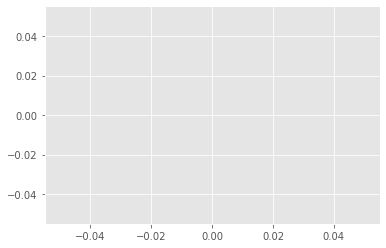

[2022-01-31 14:32:24.001840] 
[2022-01-31 14:32:24.030936] YLiveTicker.on_close() takes 2 positional arguments but 4 were given


In [141]:

opt = Options740(ticker, buy_price, strike_price, exp, today_string, 2)


opt.live_updates()

In [108]:
import yliveticker as live

def on_new_msg(ws, msg):
    print(msg)

#on_ticker=on_new_msg, 
live_price = live.YLiveTicker(on_ticker=on_new_msg, ticker_names=[ticker])

#live_price['price']

[2022-01-31 13:54:22.058520] ### connection is open ###


{'id': 'IWM', 'exchange': 'PCX', 'quoteType': 20, 'price': 199.42999267578125, 'timestamp': 1643658860000, 'marketHours': 1, 'changePercent': 2.140841245651245, 'dayVolume': 34772057, 'change': 4.17999267578125, 'priceHint': 2}
{'id': 'IWM', 'exchange': 'PCX', 'quoteType': 20, 'price': 199.42999267578125, 'timestamp': 1643658861000, 'marketHours': 1, 'changePercent': 2.140841245651245, 'dayVolume': 34772883, 'change': 4.17999267578125, 'priceHint': 2}


[2022-01-31 13:54:25.656777] 
[2022-01-31 13:54:25.677967] YLiveTicker.on_close() takes 2 positional arguments but 4 were given
